In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = pd.read_csv(r'C:\Users\user\Downloads\dataframe_.csv',skipinitialspace=True)

In [3]:
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [4]:
data.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [5]:
data.shape
data.size
data.info()

(1697, 2)

3394

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


## Data Cleaning

### check for duplicates

In [6]:
data.duplicated()
data.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
1692     True
1693     True
1694     True
1695     True
1696     True
Length: 1697, dtype: bool

False    1091
True      606
dtype: int64

In [7]:
data[data.duplicated()]

,input,output
106,-63.366669,-33.000000
464,112.633331,103.000000
715,-31.366669,-49.000000
819,-117.366669,-75.000000
865,-131.366669,-125.000000
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [8]:
data.drop_duplicates(keep='first',inplace=True)

In [9]:
data.reset_index(inplace=True)

In [10]:
data.drop(['index'],axis=1,inplace=True)

In [11]:
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1086,-119.954237,123.609122
1087,-109.942155,127.197394
1088,-111.515368,128.170885
1089,-110.344221,123.087950


##  Checking Missig Values

In [12]:
data.isna().sum()

input     1
output    1
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1090 non-null   float64
 1   output  1090 non-null   float64
dtypes: float64(2)
memory usage: 17.2 KB


- In input and output column we have One missing value.

In [14]:
data.input.mean()
data.input.median()

8.116185427163302

17.462087345

In [15]:
x=data.input.median()
data.input.fillna(x,inplace=True)

- Replacing the nan value with median in `input` column.

In [16]:
data.output.mean()
data.output.median()

-27.383628220210085

-46.30093846

In [17]:
y=data.output.median()
data.output.fillna(x,inplace=True)

- Replacing the nan value with median in `output` column.

In [18]:
data.isna().sum()

input     0
output    0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1091 non-null   float64
 1   output  1091 non-null   float64
dtypes: float64(2)
memory usage: 17.2 KB


## Checking Outliers

In [20]:
data.skew()

input    -0.284121
output    0.920562
dtype: float64

<AxesSubplot:>

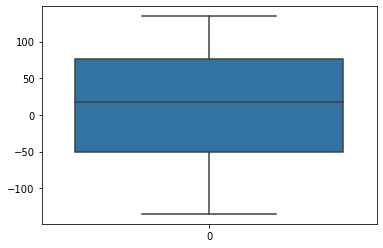

In [21]:
sns.boxplot(data.input)

- There are no outliers for `input` column.

<AxesSubplot:>

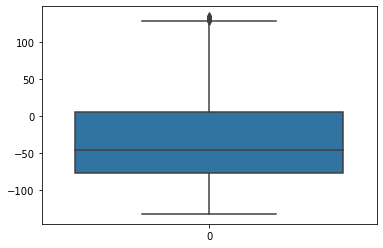

In [22]:
sns.boxplot(data.output)

- There are some outliers for `output` column.

In [23]:
Q1,Q2,Q3=tuple(data.output.quantile(q=[0.25,0.50,0.75]))
print(Q1,Q2,Q3)

-76.9885951 -46.26979181 5.230365357


In [24]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

82.218960457 128.5588060425 -200.3170357855


#### Applying Logtransformation to reduce the outliers

In [25]:
Q1,Q2,Q3=(np.log(data.output).quantile(q = [0.25,0.5,0.75]))
print(Q1,Q2,Q3)

3.713793600472108 4.385773535731744 4.6864674781353095


In [26]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

0.9726738776632016 6.145478294630112 2.254782783977306


<AxesSubplot:>

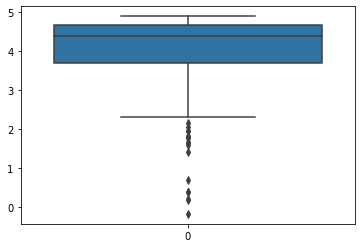

In [27]:
sns.boxplot(np.log(data.output))

In [28]:
data[(np.log(data.output) > UL) | (np.log(data.output)< LL)]

,input,output
299,82.896050,1.467981
305,84.633331,7.000000
306,84.775244,8.755985
397,58.916087,5.150802
398,71.036419,7.107772
403,80.633331,5.000000
404,94.824780,1.216252
410,73.465372,1.493731
413,80.214195,5.964164
526,84.096267,6.148041


#### Applying Cuberoot Transformation to reduce the outliers

In [29]:
Q1, Q2,Q3= (((data.output)**(1/3)).quantile(q = [0.25,0.5,0.75]))

In [30]:
IQR=Q3-Q1
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
print(IQR,UL,LL)

1.3206196007869915 6.750020912146148 1.4675425089981826


<AxesSubplot:>

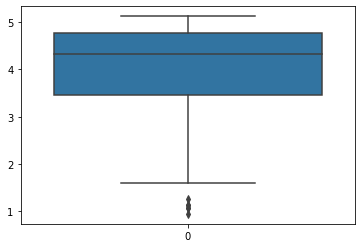

In [31]:
sns.boxplot((data.output)**(1/3))

In [32]:
data[(((data.output)**(1/3))> UL) | (((data.output)**(1/3))< LL)]

,input,output
299,82.896050,1.467981
404,94.824780,1.216252
410,73.465372,1.493731
528,94.286977,1.237683
532,84.237928,0.842715
998,80.633331,2.000000


- To reduce the outliers we use `transformation` techniques.
- By obersving this `cuberoot transformation` reducing more outliers than `logtransformation`. 

## Without Outliers 

In [33]:
Q1,Q2,Q3=((data.output).quantile(q=[0.25,0.50,0.75]))
print(Q1,Q2,Q3)

-76.9885951 -46.26979181 5.230365357


In [34]:
IQR=Q3-Q1
UL=Q3+(1.5)*IQR
LL=Q1-(1.5)*IQR
print(IQR,LL,UL)

82.218960457 -200.3170357855 128.5588060425


In [35]:
tem_data=data[~(data.output > UL) | (data.output < LL)]

In [36]:
data[(data.output > UL) | (data.output < LL)].index.value_counts()

358     1
359     1
361     1
471     1
473     1
475     1
478     1
1056    1
1060    1
1061    1
1062    1
1066    1
1068    1
1069    1
1071    1
dtype: int64

In [37]:
tem_data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1086,-119.954237,123.609122
1087,-109.942155,127.197394
1088,-111.515368,128.170885
1089,-110.344221,123.087950


## Analysis (EDA)

In [38]:
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1086,-119.954237,123.609122
1087,-109.942155,127.197394
1088,-111.515368,128.170885
1089,-110.344221,123.087950


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1091 non-null   float64
 1   output  1091 non-null   float64
dtypes: float64(2)
memory usage: 17.2 KB


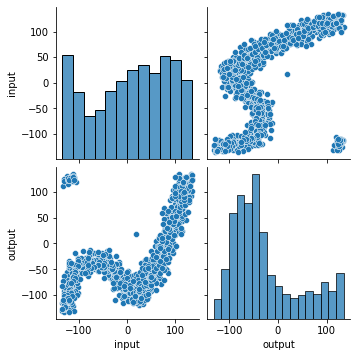

In [40]:
sns.pairplot(data)

<AxesSubplot:>

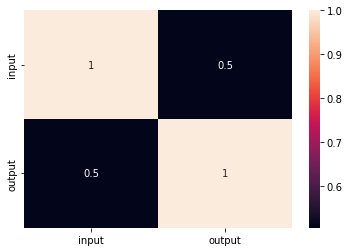

In [41]:
sns.heatmap(data.corr(),annot=True)

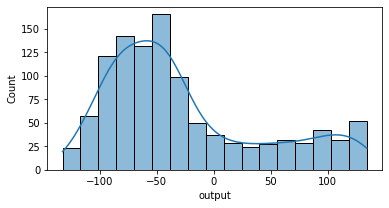

In [42]:
plt.figure(figsize=(6,3))

sns.histplot(data.output.astype(float), kde = True);

## Data Preparation

## Without Outliers Applying Algorithms

In [43]:
# Identifying the input(X) and target variable output(y)

X=tem_data[["input"]]
y=tem_data["output"]

In [44]:
# split into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=0)

In [45]:
X_train.head()

,input
1049,116.614886
154,-50.893698
261,44.633331
425,74.412980
757,-83.805629


In [46]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(807, 1) (807,)
(269, 1) (269,)


In [47]:
# Scaling the numerical feature

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_train_rescaled.head()

,input
1049,1.437742
154,-0.719008
261,0.510947
425,0.894373
757,-1.142764


In [48]:
X_train.describe()

,input
count,807.000000
mean,4.949585
std,77.715290
min,-134.962839
25%,-54.366669
50%,14.615778
75%,73.049352
max,133.907372


In [49]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test),
                              columns=X_test.columns,
                              index=X_test.index)
X_test_rescaled.head()

,input
239,0.409048
1019,1.054144
732,-0.725098
493,1.360727
568,0.920478


## Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_rescaled,y_train)

LinearRegression()

In [51]:
y_test_pred = regressor.predict(X_test_rescaled)

In [52]:
tem_data = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
tem_data.head()

,Actual,Predicted
239,-72.833758,-18.345161
1019,41.614172,1.669998
732,-32.000000,-53.533873
493,92.000000,11.182243
568,-30.400176,-2.477190


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

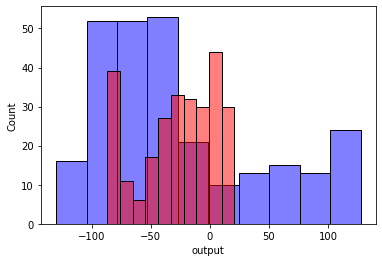

In [53]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [54]:
from sklearn import metrics

MeanAbsoluteError_LR = metrics.mean_absolute_error(y_test,y_test_pred)
MeanSquaredError_LR = metrics.mean_squared_error(y_test,y_test_pred)
RootMeanSquaredError_LR = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

print('Mean Absolute Error: ',MeanAbsoluteError_LR)
print('Mean Squared Error: ',MeanSquaredError_LR)
print('Root Mean Squared Error: ',RootMeanSquaredError_LR)

Mean Absolute Error:  44.751299001585075
Mean Squared Error:  3023.4589560404565
Root Mean Squared Error:  54.9859887247693


## KNN Regression

In [55]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_rescaled, y_train)

KNeighborsRegressor()

In [56]:
y_test_pred = regressor.predict(X_test_rescaled)

In [57]:
tem_data = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
tem_data.head()

,Actual,Predicted
239,-72.833758,-55.139444
1019,41.614172,1.232215
732,-32.000000,-43.701836
493,92.000000,92.591137
568,-30.400176,-12.100595


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

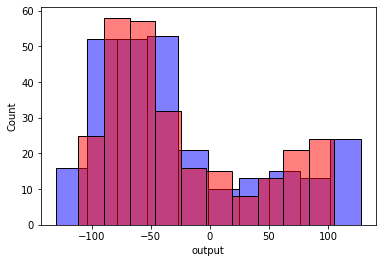

In [58]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [59]:
from sklearn import metrics

MeanAbolusteError_KNN = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_KNN = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_KNN = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ', MeanAbolusteError_KNN)

print('Mean Squared Error: ', MeanSquaredError_KNN)

print('Root Mean Squared Error: ',RootMeanSquaredError_KNN)

Mean Absolute Error:  22.68996282192565
Mean Squared Error:  1066.631584418201
Root Mean Squared Error:  32.65932614764428


## Decision Tree Regression

In [60]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_rescaled,y_train)

DecisionTreeRegressor()

In [61]:
y_test_pred = regressor.predict(X_test_rescaled)

In [62]:
tem_data = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
tem_data.head()

,Actual,Predicted
239,-72.833758,-90.242897
1019,41.614172,30.000000
732,-32.000000,-37.000000
493,92.000000,100.959926
568,-30.400176,-37.961947


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

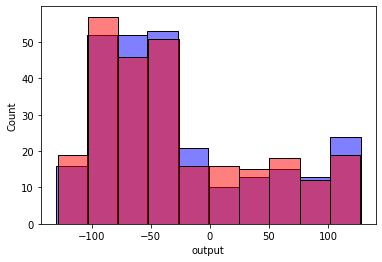

In [63]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [64]:
from sklearn import metrics

MeanAbsoluteError_DTR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_DTR =  metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_DTR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ', MeanAbsoluteError_DTR)

print('Mean Squared Error: ', MeanSquaredError_DTR)

print('Root Mean Squared Error: ', RootMeanSquaredError_DTR)

Mean Absolute Error:  27.99348209824659
Mean Squared Error:  1904.6352252238564
Root Mean Squared Error:  43.642126726637144


## Random Forest Regression

In [65]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_rescaled,y_train)

RandomForestRegressor()

In [66]:
y_test_pred = regressor.predict(X_test_rescaled)

In [67]:
temp_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_data.head()

,Actual,Predicted
239,-72.833758,-70.022434
1019,41.614172,26.960768
732,-32.000000,-37.682867
493,92.000000,96.538799
568,-30.400176,-35.996615


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

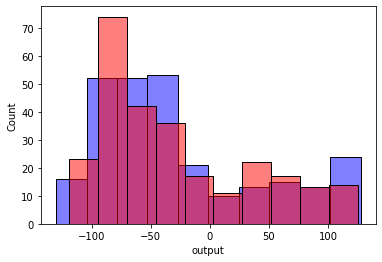

In [68]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [69]:
from sklearn import metrics

MeanAbsoluteError_RFR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_RFR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_RFR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ', MeanAbsoluteError_RFR)

print('Mean Squared Error: ', MeanSquaredError_RFR)

print('Root Mean Squared Error: ', RootMeanSquaredError_RFR)

Mean Absolute Error:  24.87500015756189
Mean Squared Error:  1373.3739844632178
Root Mean Squared Error:  37.05906076067252


## Gradient Boosting Decision Tree Regression

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_rescaled, y_train)

GradientBoostingRegressor()

In [71]:
y_test_pred = regressor.predict(X_test_rescaled)

In [72]:
temp_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_data.head()

,Actual,Predicted
239,-72.833758,-69.583677
1019,41.614172,15.202406
732,-32.000000,-40.956518
493,92.000000,81.191362
568,-30.400176,-8.607471


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

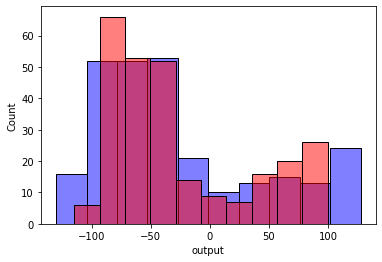

In [73]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [74]:
from sklearn import metrics

MeanAbsoluteError_GBDT = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_GBDT = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_GBDT = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Mean Absolute Error: ', MeanAbsoluteError_GBDT)

print('Mean Squared Error: ', MeanSquaredError_GBDT)

print('Root Mean Squared Error: ', RootMeanSquaredError_GBDT)

Mean Absolute Error:  21.7048958807265
Mean Squared Error:  1078.0830742841044
Root Mean Squared Error:  32.83417540131173


## Ada Boost Regression

In [75]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost=AdaBoostRegressor()
ada_boost.fit(X_train_rescaled,y_train)

AdaBoostRegressor()

In [76]:
y_test_pred=ada_boost.predict(X_test_rescaled)

In [77]:
temp_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_data.head()

,Actual,Predicted
239,-72.833758,-67.645923
1019,41.614172,6.385371
732,-32.000000,-66.310359
493,92.000000,72.781401
568,-30.400176,-16.158618


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

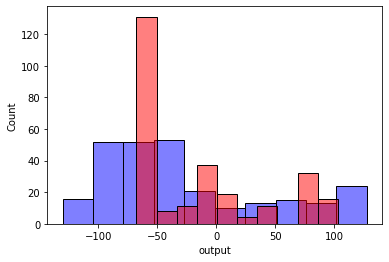

In [78]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [79]:
from sklearn import metrics

MeanAbsoluteError_ABR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_ABR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_ABR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Mean Absolute Error: ', MeanAbsoluteError_ABR)

print('Mean Squared Error: ', MeanSquaredError_ABR)

print('Root Mean Squared Error: ', RootMeanSquaredError_ABR)

Mean Absolute Error:  30.514922413718914
Mean Squared Error:  1614.2550773742855
Root Mean Squared Error:  40.177793336298166


In [80]:
data_without_outliers = [['Linear Regression',MeanAbsoluteError_LR,MeanSquaredError_LR,RootMeanSquaredError_LR],
       ['KNN Regression',MeanAbolusteError_KNN,MeanSquaredError_KNN,RootMeanSquaredError_KNN],
       ['Desicion Tree Regression',MeanAbsoluteError_DTR,MeanSquaredError_DTR,RootMeanSquaredError_DTR],
       ['Random Forest Regression',MeanAbsoluteError_RFR,MeanSquaredError_RFR,RootMeanSquaredError_RFR],
       ['Gradient Boosting Desicion Tree Regression',MeanAbsoluteError_GBDT,MeanSquaredError_GBDT,RootMeanSquaredError_GBDT],
       ['AdaBoost Regression',MeanAbsoluteError_ABR,MeanSquaredError_ABR,RootMeanSquaredError_ABR]]
result_without_outliers= pd.DataFrame(data_without_outliers,columns = ['Algorithm','Mean_Absolute_Error','Mean_Squared_Error','Root_Mean_Squared_Error'])

In [81]:
result_without_outliers

,Algorithm,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error
0,Linear Regression,44.751299,3023.458956,54.985989
1,KNN Regression,22.689963,1066.631584,32.659326
2,Desicion Tree Regression,27.993482,1904.635225,43.642127
3,Random Forest Regression,24.875000,1373.373984,37.059061
4,Gradient Boosting Desicion Tree Regression,21.704896,1078.083074,32.834175
5,AdaBoost Regression,30.514922,1614.255077,40.177793


In [82]:
# Identifying the input(X) and target variable output(y)

y=data['output']
X=data[['input']]

In [83]:
# split into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=0)

In [84]:
X_train.head()

,input
255,55.475282
506,80.751526
698,-23.995420
435,100.633331
144,-49.852393


In [85]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(818, 1) (818,)
(273, 1) (273,)


In [86]:
# Scaling the numerical feature

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_train_rescaled.head()

,input
255,0.614342
506,0.938358
698,-0.404392
435,1.193223
144,-0.735852


In [87]:
X_train.describe()

,input
count,818.000000
mean,7.550896
std,78.056994
min,-134.962839
25%,-50.898327
50%,16.747063
75%,75.962672
max,133.907372


In [88]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test),
                              columns=X_test.columns,
                              index=X_test.index)
X_test_rescaled.head()

,input
27,-1.665412
650,-0.114412
484,1.500977
803,-1.597613
947,0.276128


## With Outliers Applying the Algorithms

### Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_rescaled,y_train)

LinearRegression()

In [90]:
y_test_pred = regressor.predict(X_test_rescaled)

In [91]:
tem_data = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
tem_data.head()

,Actual,Predicted
27,-86.000000,-82.308513
650,-104.595355,-31.812261
484,106.879706,20.780298
803,-38.589729,-80.101154
947,-104.943052,-19.097369


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

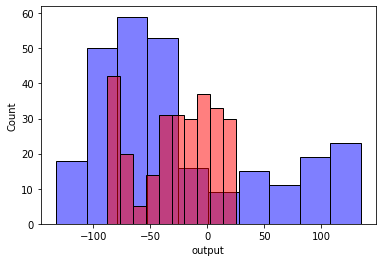

In [92]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [93]:
from sklearn import metrics

MeanAbsoluteError_LR = metrics.mean_absolute_error(y_test,y_test_pred)
MeanSquaredError_LR = metrics.mean_squared_error(y_test,y_test_pred)
RootMeanSquaredError_LR = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

print('Mean Absolute Error: ',MeanAbsoluteError_LR)
print('Mean Squared Error: ',MeanSquaredError_LR)
print('Root Mean Squared Error: ',RootMeanSquaredError_LR)

Mean Absolute Error:  48.083377552075355
Mean Squared Error:  3730.909774079002
Root Mean Squared Error:  61.08117364686931


### KNN REgression

In [94]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_rescaled, y_train)

KNeighborsRegressor()

In [95]:
y_test_pred = regressor.predict(X_test_rescaled)

In [96]:
tem_data = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
tem_data.head()

,Actual,Predicted
27,-86.000000,27.410071
650,-104.595355,-91.956543
484,106.879706,85.346733
803,-38.589729,9.983575
947,-104.943052,-85.591085


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

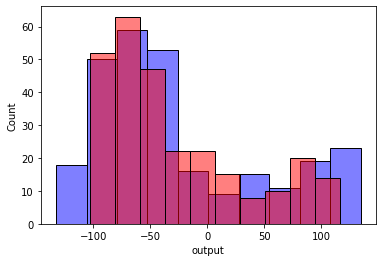

In [97]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [98]:
from sklearn import metrics

MeanAbolusteError_KNN = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_KNN = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_KNN = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ', MeanAbolusteError_KNN)

print('Mean Squared Error: ', MeanSquaredError_KNN)

print('Root Mean Squared Error: ',RootMeanSquaredError_KNN)

Mean Absolute Error:  27.329678907996335
Mean Squared Error:  1813.2343741060738
Root Mean Squared Error:  42.58208982783811


## Decision Tree Regression

In [99]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_rescaled,y_train)

DecisionTreeRegressor()

In [100]:
y_test_pred = regressor.predict(X_test_rescaled)

In [101]:
tem_data = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
tem_data.head()

,Actual,Predicted
27,-86.000000,-89.000000
650,-104.595355,-76.000000
484,106.879706,90.472122
803,-38.589729,-75.000000
947,-104.943052,-82.796934


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

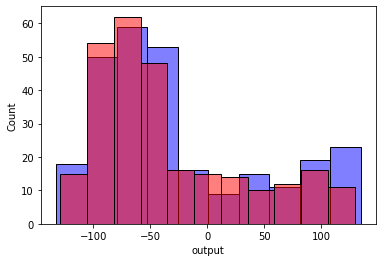

In [102]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [103]:
from sklearn import metrics

MeanAbsoluteError_DTR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_DTR =  metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_DTR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ', MeanAbsoluteError_DTR)

print('Mean Squared Error: ', MeanSquaredError_DTR)

print('Root Mean Squared Error: ', RootMeanSquaredError_DTR)

Mean Absolute Error:  29.82271724378266
Mean Squared Error:  2376.882012296373
Root Mean Squared Error:  48.75327693905685


### Random Forest Regression

In [104]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_rescaled,y_train)

RandomForestRegressor()

In [105]:
y_test_pred = regressor.predict(X_test_rescaled)

In [106]:
temp_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_data.head()

,Actual,Predicted
27,-86.000000,-16.830570
650,-104.595355,-82.926634
484,106.879706,95.980527
803,-38.589729,-23.738339
947,-104.943052,-81.620812


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

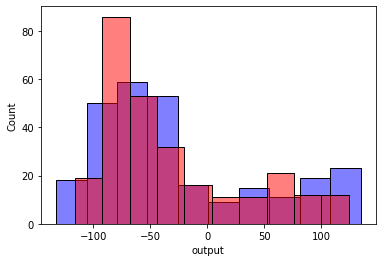

In [107]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [108]:
from sklearn import metrics

MeanAbsoluteError_RFR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_RFR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_RFR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error: ', MeanAbsoluteError_RFR)

print('Mean Squared Error: ', MeanSquaredError_RFR)

print('Root Mean Squared Error: ', RootMeanSquaredError_RFR)

Mean Absolute Error:  27.400078623934768
Mean Squared Error:  1930.5358292021688
Root Mean Squared Error:  43.937863275336554


### Gradient Boosting Decision Tree Regression

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_rescaled, y_train)

GradientBoostingRegressor()

In [110]:
y_test_pred = regressor.predict(X_test_rescaled)

In [111]:
temp_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_data.head()

,Actual,Predicted
27,-86.000000,-76.966913
650,-104.595355,-85.638508
484,106.879706,97.774788
803,-38.589729,-24.467623
947,-104.943052,-82.206858


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

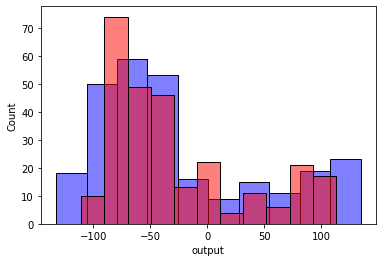

In [112]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [113]:
from sklearn import metrics

MeanAbsoluteError_GBDT = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_GBDT = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_GBDT = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Mean Absolute Error: ', MeanAbsoluteError_GBDT)

print('Mean Squared Error: ', MeanSquaredError_GBDT)

print('Root Mean Squared Error: ', RootMeanSquaredError_GBDT)

Mean Absolute Error:  24.08378662865651
Mean Squared Error:  1530.710667213912
Root Mean Squared Error:  39.1242976577716


### AdaBoost Regression

In [114]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost=AdaBoostRegressor()
ada_boost.fit(X_train_rescaled,y_train)

AdaBoostRegressor()

In [115]:
y_test_pred=ada_boost.predict(X_test_rescaled)

In [116]:
temp_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_data.head()

,Actual,Predicted
27,-86.000000,1.054303
650,-104.595355,-65.141995
484,106.879706,100.783941
803,-38.589729,2.308457
947,-104.943052,-65.141995


<AxesSubplot:xlabel='output', ylabel='Count'>

<AxesSubplot:xlabel='output', ylabel='Count'>

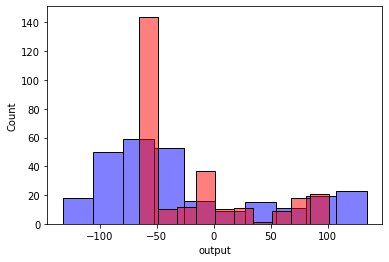

In [117]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [118]:
from sklearn import metrics

MeanAbsoluteError_ABR = metrics.mean_absolute_error(y_test, y_test_pred)
MeanSquaredError_ABR = metrics.mean_squared_error(y_test, y_test_pred)
RootMeanSquaredError_ABR = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Mean Absolute Error: ', MeanAbsoluteError_ABR)

print('Mean Squared Error: ', MeanSquaredError_ABR)

print('Root Mean Squared Error: ', RootMeanSquaredError_ABR)

Mean Absolute Error:  31.539030183149304
Mean Squared Error:  1961.5809076050077
Root Mean Squared Error:  44.28973817494305


In [119]:
data = [['Linear Regression',MeanAbsoluteError_LR,MeanSquaredError_LR,RootMeanSquaredError_LR],
       ['KNN Regression',MeanAbolusteError_KNN,MeanSquaredError_KNN,RootMeanSquaredError_KNN],
       ['Desicion Tree Regression',MeanAbsoluteError_DTR,MeanSquaredError_DTR,RootMeanSquaredError_DTR],
       ['Random Forest Regression',MeanAbsoluteError_RFR,MeanSquaredError_RFR,RootMeanSquaredError_RFR],
       ['Gradient Boosting Desicion Tree Regression',MeanAbsoluteError_GBDT,MeanSquaredError_GBDT,RootMeanSquaredError_GBDT],
       ['AdaBoost Regression',MeanAbsoluteError_ABR,MeanSquaredError_ABR,RootMeanSquaredError_ABR]]
result = pd.DataFrame(data,columns = ['Algorithm','Mean_Absolute_Error','Mean_Squared_Error','Root_Mean_Squared_Error'])

In [120]:
result

,Algorithm,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error
0,Linear Regression,48.083378,3730.909774,61.081174
1,KNN Regression,27.329679,1813.234374,42.582090
2,Desicion Tree Regression,29.822717,2376.882012,48.753277
3,Random Forest Regression,27.400079,1930.535829,43.937863
4,Gradient Boosting Desicion Tree Regression,24.083787,1530.710667,39.124298
5,AdaBoost Regression,31.539030,1961.580908,44.289738


In [122]:
result_without_outliers

,Algorithm,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error
0,Linear Regression,44.751299,3023.458956,54.985989
1,KNN Regression,22.689963,1066.631584,32.659326
2,Desicion Tree Regression,27.993482,1904.635225,43.642127
3,Random Forest Regression,24.875000,1373.373984,37.059061
4,Gradient Boosting Desicion Tree Regression,21.704896,1078.083074,32.834175
5,AdaBoost Regression,30.514922,1614.255077,40.177793


<AxesSubplot:xlabel='Mean_Absolute_Error', ylabel='Algorithm'>

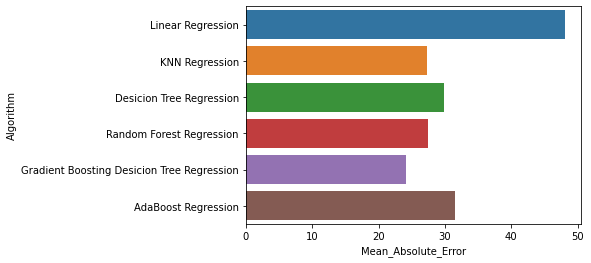

In [121]:
sns.barplot(y=result.Algorithm,x=result.Mean_Absolute_Error)

<AxesSubplot:xlabel='Mean_Absolute_Error', ylabel='Algorithm'>

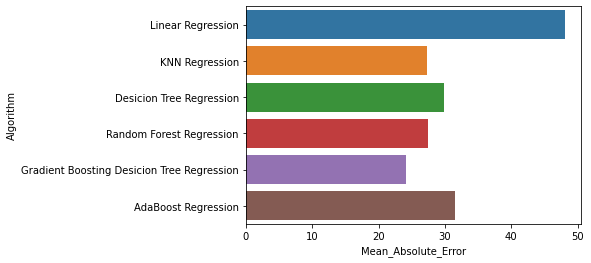

In [123]:
sns.barplot(y=result_without_outliers.Algorithm,x=result.Mean_Absolute_Error)

## Observation

- Gradient Boosting Have the Least Error compare to all other algorithms.